In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Loading the dataset

In [31]:
df_train=pd.read_csv('digit-recognizer/train.csv')

## How data look like?

In [32]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## What is the size of the data

In [33]:
df_train.shape

(42000, 785)

This dataset has one output variable named 'label' and other are the image pixels in the flaten format( 28*28 image= 748 pixels)

## Get random sample to see the labels

In [34]:
df_train.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21762,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3121,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27422,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31812,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14118,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25668,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4404,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7514,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31759,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16874,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Draw the Pixels to see the image and compare it with label

In [35]:
data_20855= df_train.iloc[20855]
data_20855

label       6
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 20855, Length: 785, dtype: int64

Label is showing that this is digit 6.

### Let's draw pixels into image

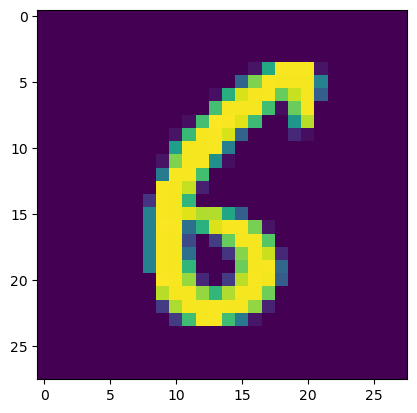

In [36]:
plt.imshow(data_20855[1:].values.reshape(28,28))

We can clearly see that this is the number 6 which matches with label value

In [37]:
X = df_train.drop( columns = ['label'], axis = 1)
y = df_train['label']

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape

(33600, 784)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn= KNeighborsClassifier()

In [49]:

knn.fit(X_train,y_train)


KNeighborsClassifier()

In [50]:
import time
start= time.time()
y_pred= knn.predict(X_test)
print(time.time()-start)

7.581006288528442


In [51]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {score}')

Accuracy Score: 0.9648809523809524


# Lets Try the PCA

### Before implementing the PCA first move all the data points to zero mean value. So Apply the Standard Scaler

In [52]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf= scaler.transform(X_test)

In [54]:
from sklearn.decomposition import PCA

pca= PCA(n_components=100)


In [55]:
X_train_pca= pca.fit_transform(X_train_trf)
X_test_pca= pca.transform(X_test_trf)

In [56]:
X_test_pca.shape

(8400, 100)

As we have used the ncomponents parameter = 100 so it will reduce our columns from 784 to 100

In [57]:
knn_pca= KNeighborsClassifier()

In [59]:
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [63]:
y_pred_pca= knn_pca.predict(X_test_pca)

In [64]:
score_pca= accuracy_score(y_test,y_pred_pca)
print(f'Accuracy Score: {score_pca}')

Accuracy Score: 0.9544047619047619


Accuracy of our model with 100 components is 0.9544047619047619

## Lets do all this in the Loop

In [67]:
for i in range(180,200):
    pca= PCA(n_components=i)
    X_train_pca= pca.fit_transform(X_train_trf)
    X_test_pca= pca.transform(X_test_trf)

    knn_pca= KNeighborsClassifier()
    knn_pca.fit(X_train_pca, y_train)
    y_pred_pca= knn_pca.predict(X_test_pca)
    score_pca= accuracy_score(y_test,y_pred_pca)
    print(f'At n_components: {i}, Accuracy Score of KNN is : {score_pca}')

At n_components: 180, Accuracy Score of KNN is : 0.9513095238095238
At n_components: 181, Accuracy Score of KNN is : 0.9510714285714286
At n_components: 182, Accuracy Score of KNN is : 0.9514285714285714
At n_components: 183, Accuracy Score of KNN is : 0.9514285714285714
At n_components: 184, Accuracy Score of KNN is : 0.9511904761904761
At n_components: 185, Accuracy Score of KNN is : 0.9519047619047619
At n_components: 186, Accuracy Score of KNN is : 0.9510714285714286
At n_components: 187, Accuracy Score of KNN is : 0.950952380952381
At n_components: 188, Accuracy Score of KNN is : 0.9514285714285714
At n_components: 189, Accuracy Score of KNN is : 0.9510714285714286
At n_components: 190, Accuracy Score of KNN is : 0.9513095238095238
At n_components: 191, Accuracy Score of KNN is : 0.9507142857142857
At n_components: 192, Accuracy Score of KNN is : 0.9508333333333333
At n_components: 193, Accuracy Score of KNN is : 0.9510714285714286
At n_components: 194, Accuracy Score of KNN is : 